In [1]:
import scanpy as sc
import squidpy as sq
from matplotlib import pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
from algorithms import *
from data_gen import *
from spectrum_gen import *
from visualizations import *
from analysis import *
import os
from algorithms_torch import *
from data_gen import *
from datasets import *
import time
from scipy import sparse
from scipy.sparse import csr_matrix


In [2]:
def plot_genes(adata,genes_list):
    ncells = adata.X.shape[0]
    spatial_graph = sparse.csr_matrix(create_circular_graph(adata.X.shape[0],0.99))
    for i in genes_list:
        fig, ax = plt.subplots()
        ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')
        ax.plot(range(ncells),savgol_filter(np.array(adata[:,i].X[:,0]),23,3), 'k', linewidth=5.0)
        ax.set_xlabel("Location at matrix " ,  fontsize=16)
        ax.set_ylabel("Gene expression " ,  fontsize=16)
        ax.set_title(i+" expression" ,  fontsize=16)
        plt.tick_params(labelsize=16)
        ax.grid(True)
        plt.show()
        print("Circular mean and variance of " +str(i) +" " + str(circular_mean_var(adata[:,i].X[:,0])))
        try:
            print("Moran's I score of " +str(i) +" " + str(sc.metrics.morans_i(sparse.csr_matrix(spatial_graph ),adata[:,i].X[:,0])))
        except:
            print('Gene was filtered out')
    sc.pp.pca(adata)
    tick_size = 16
    for gene in genes_list:
        ax = sc.pl.pca(adata,color=gene, show=False)
        ax.tick_params(labelsize=tick_size)
        ax.xaxis.get_label().set_fontsize(tick_size)
        ax.yaxis.get_label().set_fontsize(tick_size)
        ax.title.set_fontsize(tick_size)
        fig = plt.gcf()
        cbar_ax = fig.axes[-1]
        cbar_ax.tick_params(labelsize=tick_size)
        plt.show()
    pass

def create_circular_graph(n,alpha):
    A = np.zeros((n,n))
    row = np.zeros(n)
    for k in range(n):
        if k < n / 2:
                row[k] += (alpha ** k) 
        else:
                row[k] += (alpha ** (n-k)) 
    for i in range(n):
        A[i,:]= np.roll(row,i)
    return A

def circular_mean_var(gene):
    gene_len = len(gene)
    theta = (np.array(range(gene_len)) * 2 * np.pi) / gene_len
    return circular_mean(theta,gene/ np.sum(gene))

def circular_mean_var_list(adata, list_of_genes):
        for gene in list_of_genes:
            print("Circular mean and variance of " +str(gene) + " " + str(circular_mean_var(adata[:,gene].X[:,0])))  


In [3]:
def create_circular_graph(n,alpha):
    A = np.zeros((n,n))
    row = np.zeros(n)
    for k in range(n):
        if k < n / 2:
                row[k] += (alpha ** k) 
        else:
                row[k] += (alpha ** (n-k)) 
    for i in range(n):
        A[i,:]= np.roll(row,i)
    return A

In [4]:
adata = sc.read_csv('GSE64016_H1andFUCCI_normalized_EC.csv.gz')
adata=adata.T

In [5]:
adata = adata[:213,:]
marker_genes_list= ['NUSAP1', 'KPNA2', 'CCNB1','TPX2','RPL13','MIF','PFN1','COX5A']


In [6]:
sc.pp.filter_genes(adata, min_counts=1)         # only consider genes with more than 1 count
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)                              
sc.pp.highly_variable_genes(adata, n_top_genes=3000, flavor='seurat_v3')
for gene in marker_genes_list:
    adata.var.highly_variable[gene]=True
adata = adata[:, adata.var.highly_variable]



/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:249: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_counts'] = number
/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/626889744.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.var.highly_variable[gene]=True


In [7]:
E , E_recon  = reconstruction_cyclic(adata.X , verbose=False)

In [8]:
sga_range= e_to_range(E_recon)
adata = adata[sga_range,:]


In [9]:
adata_sorted= adata.copy()

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


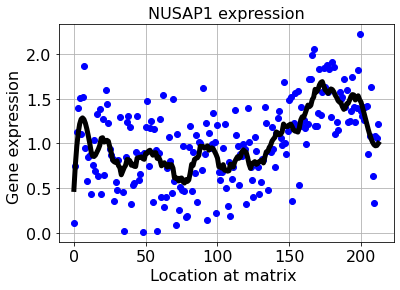

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of NUSAP1 (-0.9618593748534106, 0.8263800856384027)
Moran's I score of NUSAP1 0.06579179518006129


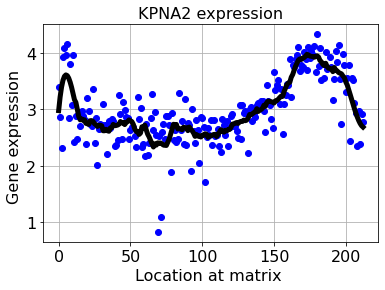

Circular mean and variance of KPNA2 (-0.910750623915327, 0.9024264407663196)
Moran's I score of KPNA2 0.10836250508777667


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


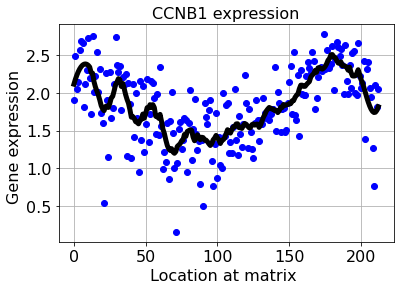

Circular mean and variance of CCNB1 (-0.538236837866442, 0.8768179547038198)
Moran's I score of CCNB1 0.08791137658412514


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


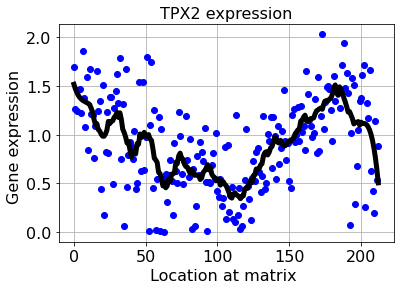

Circular mean and variance of TPX2 (-0.3576075645412631, 0.7895393400968032)
Moran's I score of TPX2 0.06983569946508245


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


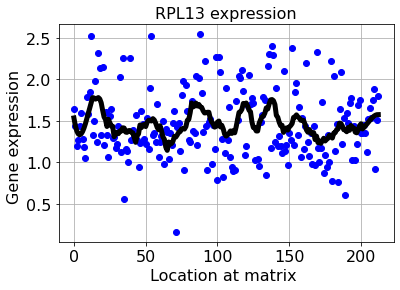

Circular mean and variance of RPL13 (-3.006920536881319, 0.9905231036678461)
Moran's I score of RPL13 0.0017684897676693444


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


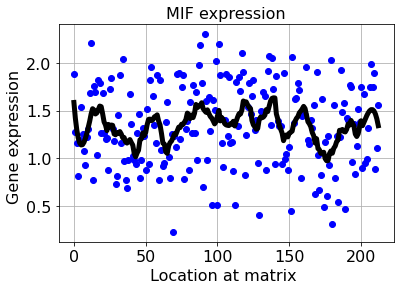

Circular mean and variance of MIF (-3.0005288760934685, 0.974618026748319)
Moran's I score of MIF 0.003829256955133149


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


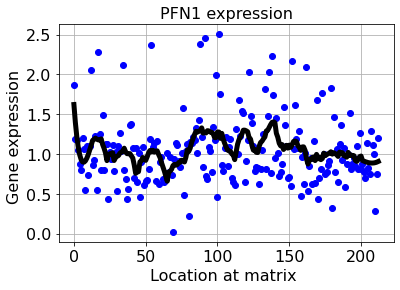

Circular mean and variance of PFN1 (-2.6398672765248983, 0.9531150852197127)
Moran's I score of PFN1 0.006739711492027734


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


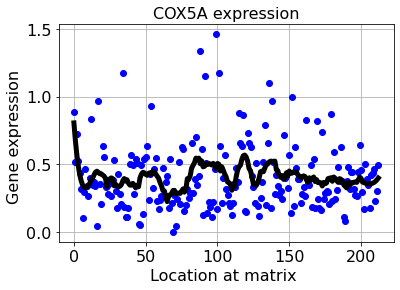

Circular mean and variance of COX5A (-2.5881845474519323, 0.9584316614497687)
Moran's I score of COX5A 0.002787112553574795


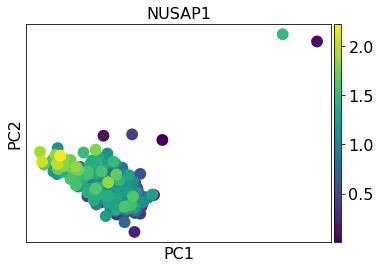

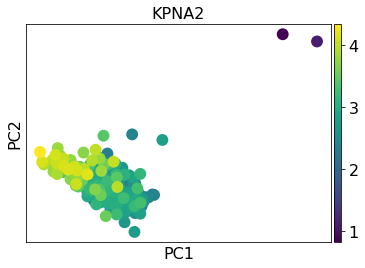

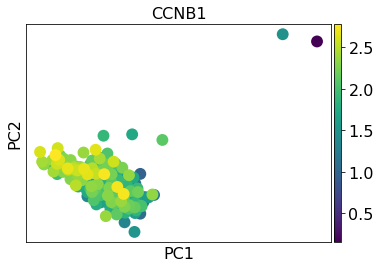

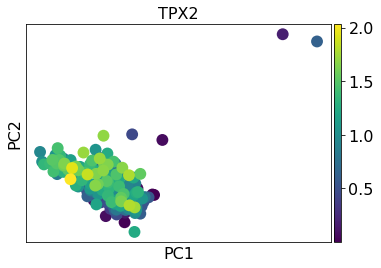

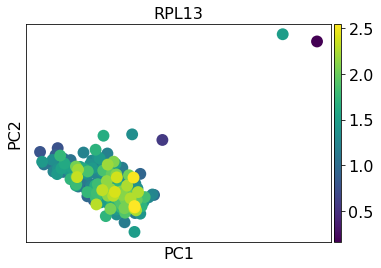

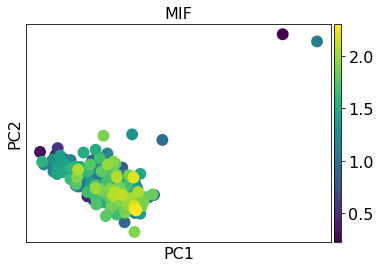

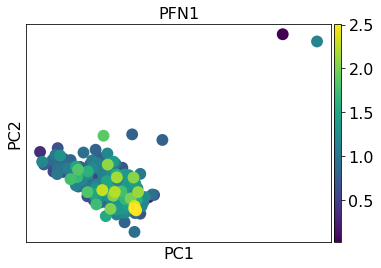

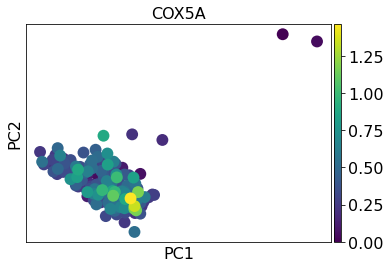

In [10]:
plot_genes(adata,marker_genes_list)

In [11]:
D  = filter_non_cyclic_genes(adata.X.astype('float64'), iterNum=500, regu=1e-1)

Iteration number: 
1
function value= 
139.62147226930117
Iteration number: 
26
function value= 
378.7968513817556
Iteration number: 
51
function value= 
415.56273863275027
Iteration number: 
76
function value= 
426.05877688606023
Iteration number: 
101
function value= 
430.86087502663406
Iteration number: 
126
function value= 
433.5467971361651
Iteration number: 
151
function value= 
435.18756133218926
Iteration number: 
176
function value= 
436.42562659780367
Iteration number: 
201
function value= 
437.40860943877385
Iteration number: 
226
function value= 
437.9622380062064
Iteration number: 
251
function value= 
438.2945914799905
Iteration number: 
276
function value= 
438.5397686951352
Iteration number: 
301
function value= 
438.73714447635507
Iteration number: 
326
function value= 
438.90172418476175
Iteration number: 
351
function value= 
439.0054099370627
Iteration number: 
376
function value= 
439.10294022568274
Iteration number: 
401
function value= 
439.17496015957306
Iteratio

In [12]:
adata.X = adata.X @ D

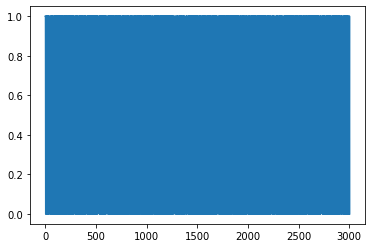

In [13]:
plt.plot(D.diagonal())

In [14]:
F = enhancement_cyclic(adata.X.astype('float64'),regu=1e-4)
adata.X = adata.X * F

Iteration number: 
1
function value: 
96.37247167368346
Iteration number: 
26
function value: 
162.33219556552635
Iteration number: 
51
function value: 
250.6999585459258
Iteration number: 
76
function value: 
347.0279394995262
Iteration number: 
101
function value: 
413.2402353344827
Iteration number: 
126
function value: 
461.0602050059374
Iteration number: 
151
function value: 
497.41919634744073
Iteration number: 
176
function value: 
525.7882388498793
Iteration number: 
201
function value: 
548.2220466010994
Iteration number: 
226
function value: 
565.7974601045055
Iteration number: 
251
function value: 
579.9980552713527
Iteration number: 
276
function value: 
591.6285390111537


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


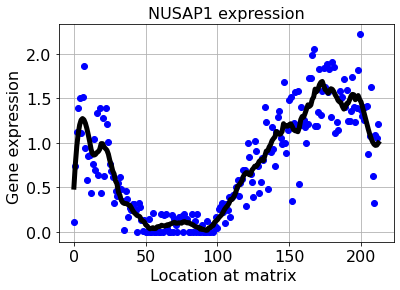

Circular mean and variance of NUSAP1 (-0.971637165777105, 0.49539724345235714)
Moran's I score of NUSAP1 0.17011341413485737


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


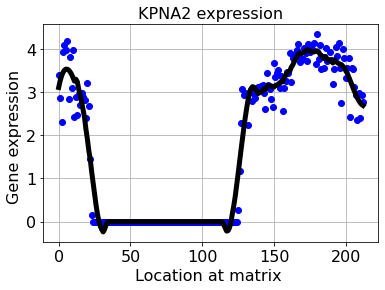

Circular mean and variance of KPNA2 (-0.9550130433530897, 0.34576353719788266)
Moran's I score of KPNA2 0.1846103172267594


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


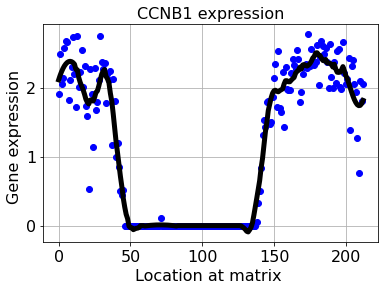

Circular mean and variance of CCNB1 (-0.4596479574014038, 0.3883837486154279)
Moran's I score of CCNB1 0.17710492736137076


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


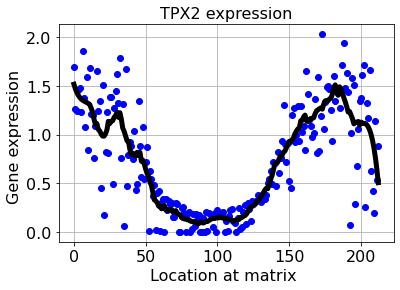

Circular mean and variance of TPX2 (-0.3976982165215572, 0.5705640382516716)
Moran's I score of TPX2 0.13998801954690088


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


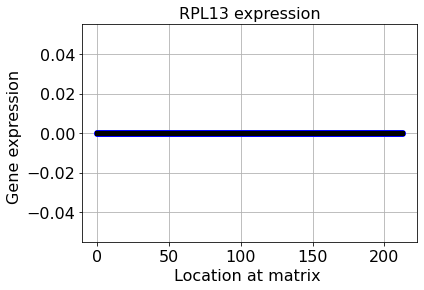

Circular mean and variance of RPL13 (nan, nan)
Gene was filtered out


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:48: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


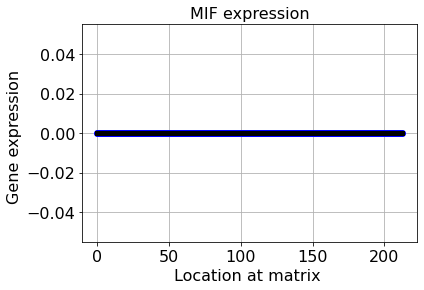

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:48: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of MIF (nan, nan)
Gene was filtered out


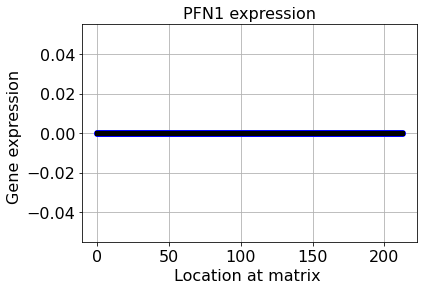

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:48: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of PFN1 (nan, nan)
Gene was filtered out


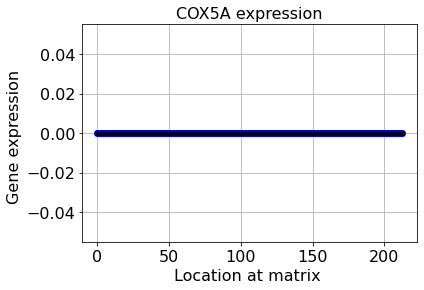

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:48: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))


Circular mean and variance of COX5A (nan, nan)
Gene was filtered out


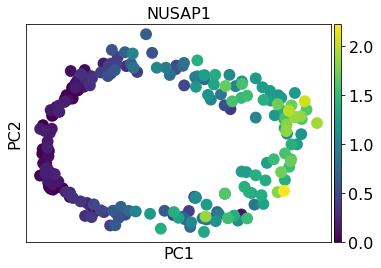

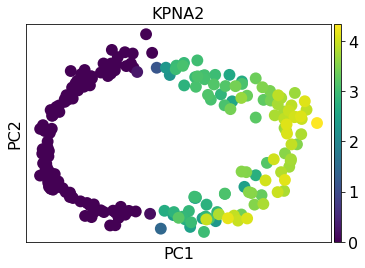

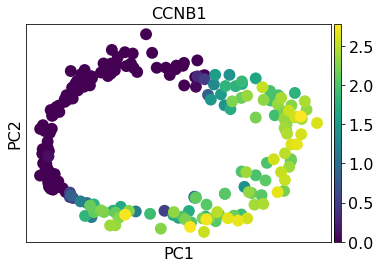

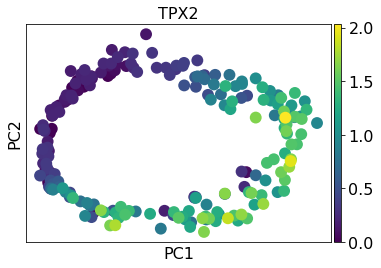

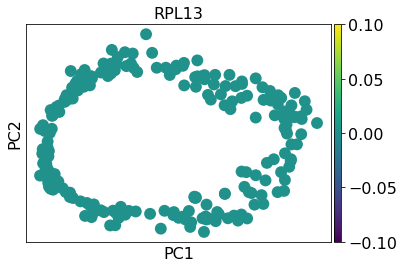

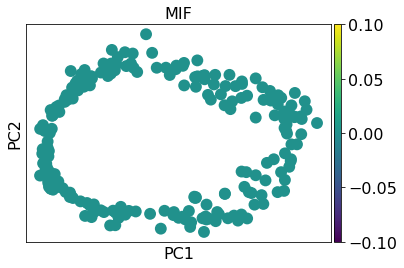

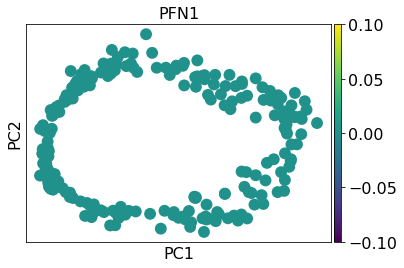

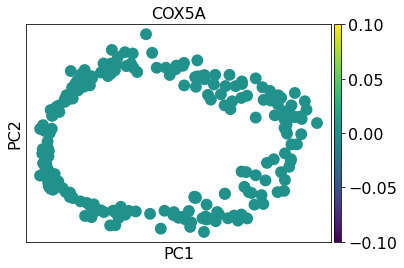

In [15]:
plot_genes(adata,marker_genes_list)

In [16]:
adata_filtered= adata_sorted.copy()
F = filtering_cyclic(adata_sorted.X.astype('float64'), regu=0 , iterNum=500)

starting filtering
25
th Iteration    Loss :: 
9.560361373364364
50
th Iteration    Loss :: 
6.146074562364804
75
th Iteration    Loss :: 
4.794383532045321
100
th Iteration    Loss :: 
4.058652388640456
125
th Iteration    Loss :: 
3.580053705830445
150
th Iteration    Loss :: 
3.2347828840734008
175
th Iteration    Loss :: 
2.9694289454219076
200
th Iteration    Loss :: 
2.756555948227694
225
th Iteration    Loss :: 
2.580833912220567
250
th Iteration    Loss :: 
2.4322461757510387
275
th Iteration    Loss :: 
2.304145858361422
300
th Iteration    Loss :: 
2.19212183460422
325
th Iteration    Loss :: 
2.0931555977903615
350
th Iteration    Loss :: 
2.0048655491030436
375
th Iteration    Loss :: 
1.9253945214163748
400
th Iteration    Loss :: 
1.8533574930379566
425
th Iteration    Loss :: 
1.7877200286124109
450
th Iteration    Loss :: 
1.7276152001648872
475
th Iteration    Loss :: 
1.6723090182241287
500
th Iteration    Loss :: 
1.6211448743543642


In [17]:
adata_filtered.X = adata_filtered.X * F

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


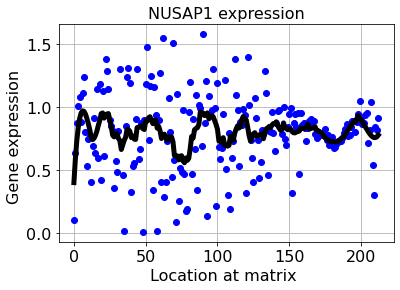

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of NUSAP1 (-0.959057813579101, 0.9908345676763388)
Moran's I score of NUSAP1 0.0007971973994197304


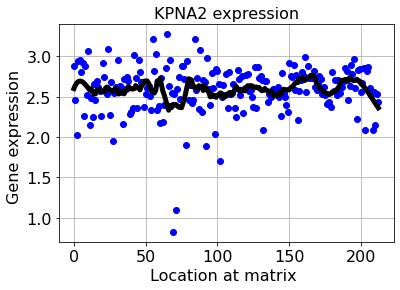

Circular mean and variance of KPNA2 (-0.9490328931227576, 0.9911397109130318)
Moran's I score of KPNA2 0.0029741237672434922


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


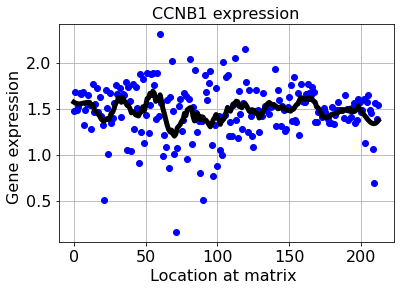

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of CCNB1 (-0.9431175258793, 0.989970400238338)
Moran's I score of CCNB1 0.002049806860036837


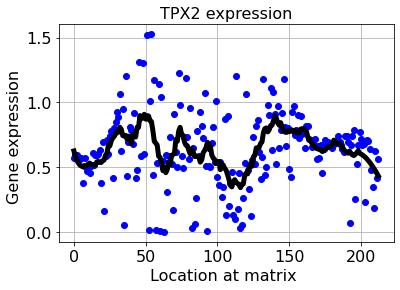

Circular mean and variance of TPX2 (-0.6727602797411889, 0.9882104284188947)
Moran's I score of TPX2 0.004106553780941916


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


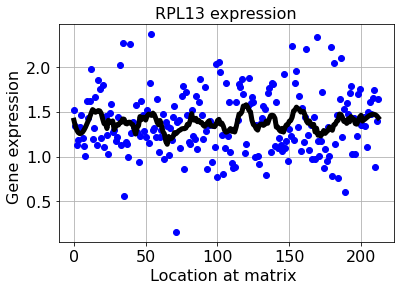

Circular mean and variance of RPL13 (-0.7765604719784026, 0.9923818075271583)
Moran's I score of RPL13 0.0007258930916028937


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


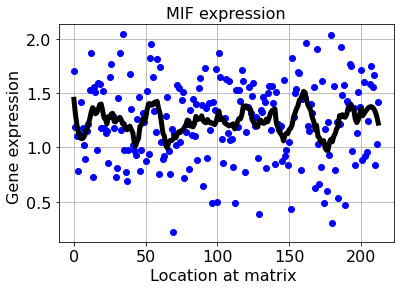

Circular mean and variance of MIF (-0.7650404364884689, 0.9926906440077891)
Moran's I score of MIF 0.0007487044000109449


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


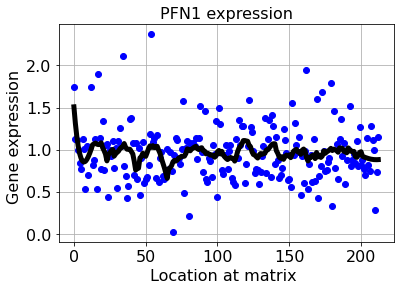

Circular mean and variance of PFN1 (-0.8295009029205802, 0.9919544972766313)
Moran's I score of PFN1 0.0006205512453091246


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


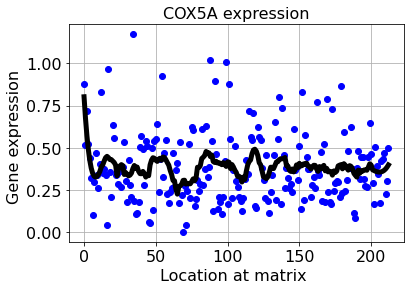

Circular mean and variance of COX5A (-0.9862166490770228, 0.9899240083332878)
Moran's I score of COX5A 0.0007175107768963857


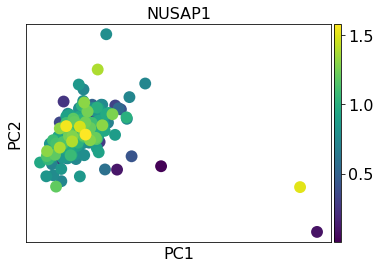

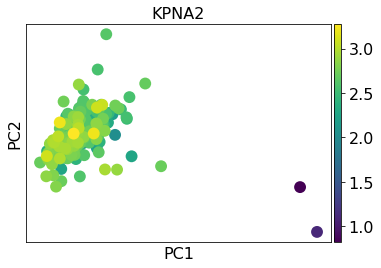

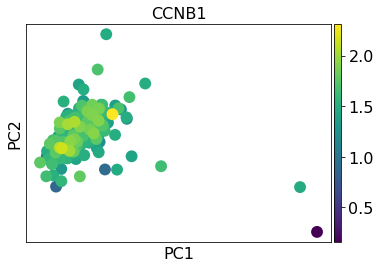

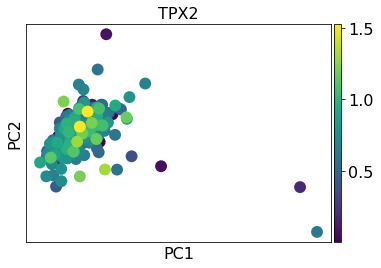

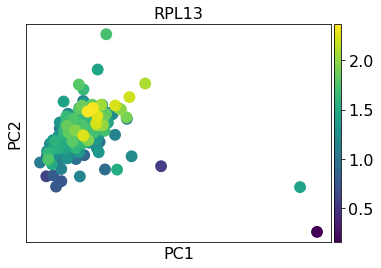

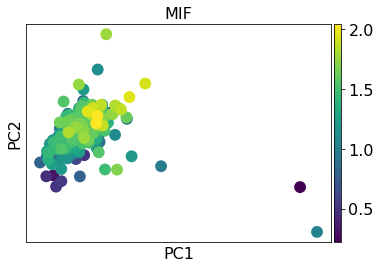

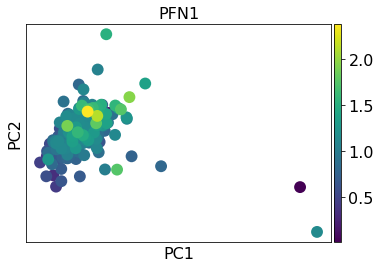

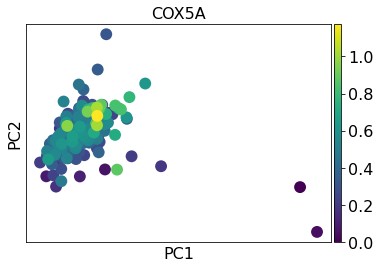

In [18]:
plot_genes(adata_filtered,marker_genes_list)

In [19]:
adata_second_signal = adata_filtered.copy()

In [20]:
E , E_recon  = reconstruction_cyclic(adata_second_signal.X , verbose=False)

In [21]:
sga_range= e_to_range(E_recon)
adata_second_signal = adata_second_signal[sga_range,:]


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


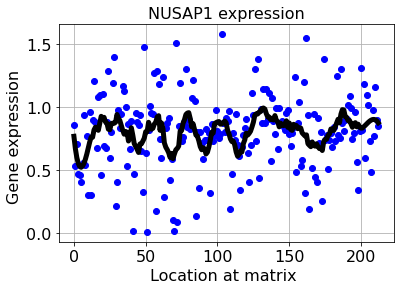

Circular mean and variance of NUSAP1 (-1.538976530006254, 0.9838560783167606)
Moran's I score of NUSAP1 0.001528735730533837


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


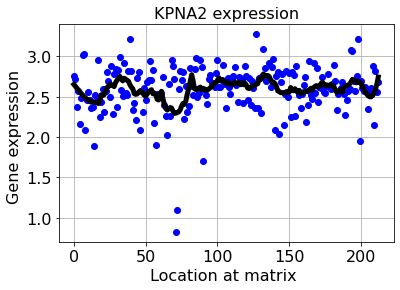

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


Circular mean and variance of KPNA2 (-1.8730605187300884, 0.9893579135758833)
Moran's I score of KPNA2 0.005048675263147816


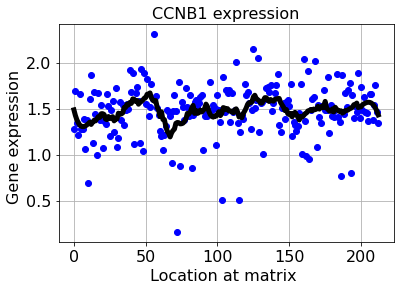

Circular mean and variance of CCNB1 (-1.9584866550805315, 0.9884017041295424)
Moran's I score of CCNB1 0.002818660604199543


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


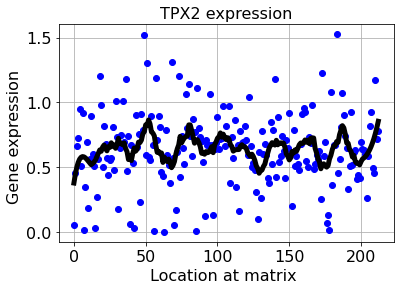

Circular mean and variance of TPX2 (2.3423596664144, 0.9790643236020372)
Moran's I score of TPX2 0.001479077689085021


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


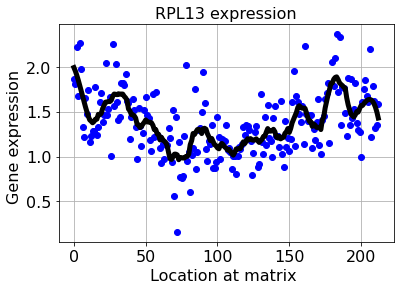

Circular mean and variance of RPL13 (-0.2093810614312691, 0.8978030973079395)
Moran's I score of RPL13 0.06719983538897747


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


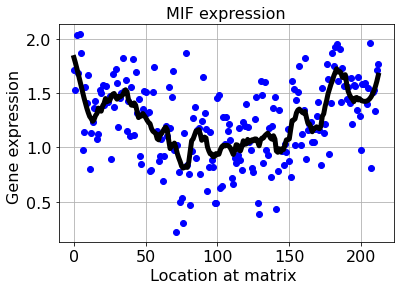

Circular mean and variance of MIF (-0.11499719363362017, 0.8847147999450446)
Moran's I score of MIF 0.06411327015853224


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


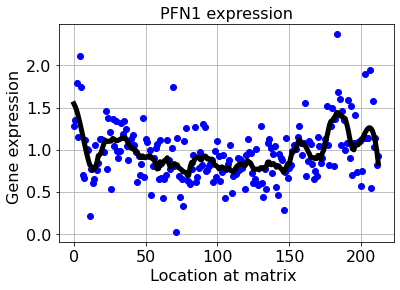

Circular mean and variance of PFN1 (-0.23048009282771675, 0.8981256011864243)
Moran's I score of PFN1 0.03770751103311202


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


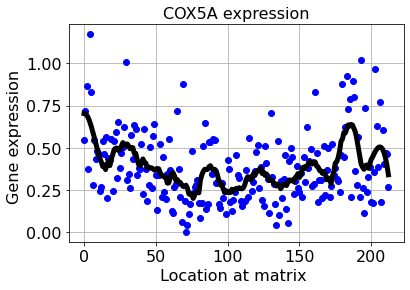

Circular mean and variance of COX5A (-0.09459399283888195, 0.8491406403241922)
Moran's I score of COX5A 0.03314756712403348


/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata.obsm['X_pca'] = X_pca


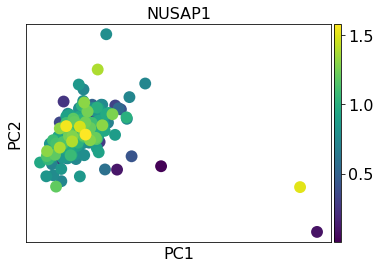

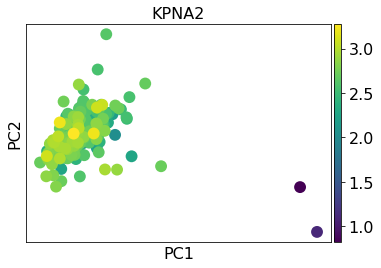

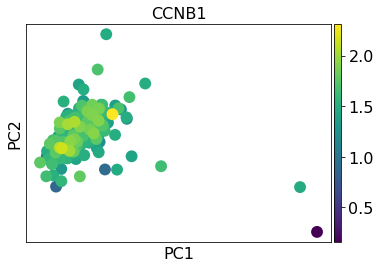

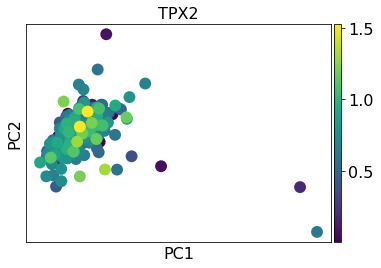

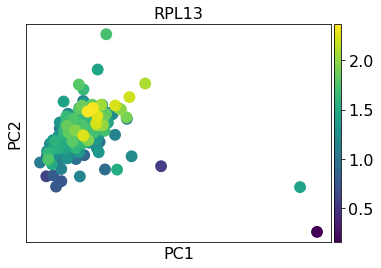

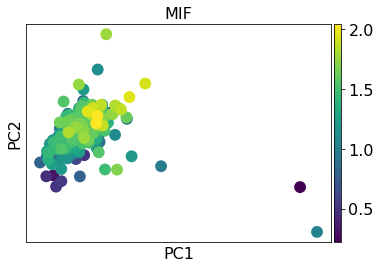

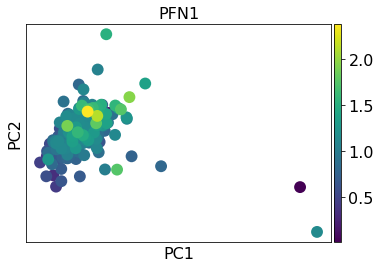

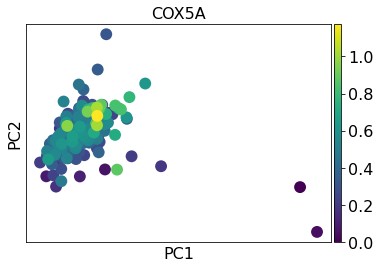

In [22]:
plot_genes(adata_second_signal,marker_genes_list)

In [23]:
D  = filter_non_cyclic_genes(adata_second_signal.X.astype('float64'), iterNum=500, regu=5e-2)

Iteration number: 
1
function value= 
106.7327375250995
Iteration number: 
26
function value= 
307.5639684648163
Iteration number: 
51
function value= 
347.776366587423
Iteration number: 
76
function value= 
361.4753850957951
Iteration number: 
101
function value= 
367.5183354642656
Iteration number: 
126
function value= 
370.62754983977953
Iteration number: 
151
function value= 
372.50024419782034
Iteration number: 
176
function value= 
373.66907720653387
Iteration number: 
201
function value= 
374.4517381484142
Iteration number: 
226
function value= 
375.1115667566043
Iteration number: 
251
function value= 
375.6240356701207
Iteration number: 
276
function value= 
376.0374232299808
Iteration number: 
301
function value= 
376.3611745003085
Iteration number: 
326
function value= 
376.6037512861827
Iteration number: 
351
function value= 
376.7792510334554
Iteration number: 
376
function value= 
376.92727176345284
Iteration number: 
401
function value= 
377.05237048586304
Iteration numbe

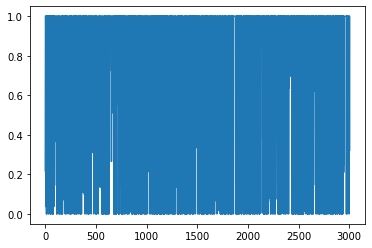

In [24]:
plt.plot(D.diagonal())

In [25]:
adata_second_signal.X = adata_second_signal.X @ D

In [26]:
F = enhancement_cyclic(adata_second_signal.X.astype('float64'),regu=1e-4)


Iteration number: 
1
function value: 
53.61099364238299
Iteration number: 
26
function value: 
76.08268078643931
Iteration number: 
51
function value: 
123.88874951738669
Iteration number: 
76
function value: 
179.36361779201613
Iteration number: 
101
function value: 
231.32661937955422
Iteration number: 
126
function value: 
276.7045532774375
Iteration number: 
151
function value: 
314.88928908683033
Iteration number: 
176
function value: 
345.0119596435853
Iteration number: 
201
function value: 
368.9583461234516
Iteration number: 
226
function value: 
388.0142183898417
Iteration number: 
251
function value: 
403.3682563922211
Iteration number: 
276
function value: 
416.0315153103339


In [27]:
adata_second_signal.X = adata_second_signal.X * F

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


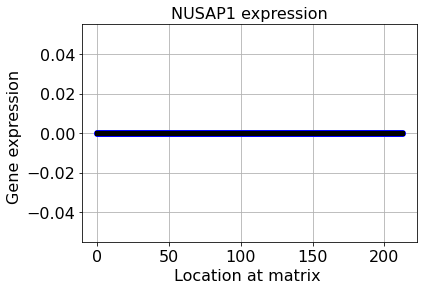

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:48: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))


Circular mean and variance of NUSAP1 (nan, nan)
Gene was filtered out


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


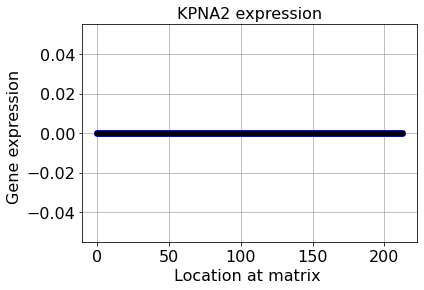

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:48: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))


Circular mean and variance of KPNA2 (nan, nan)
Gene was filtered out


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


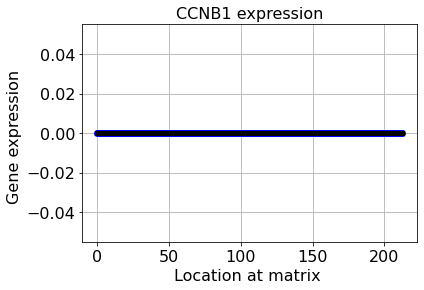

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:48: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))


Circular mean and variance of CCNB1 (nan, nan)
Gene was filtered out


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


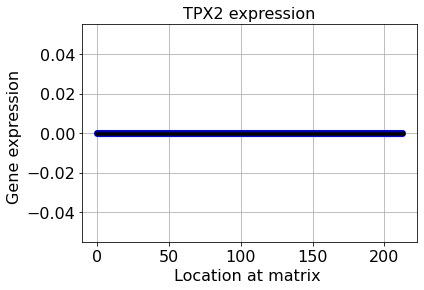

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:48: RuntimeWarning: invalid value encountered in true_divide
  return circular_mean(theta,gene/ np.sum(gene))


Circular mean and variance of TPX2 (nan, nan)
Gene was filtered out


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


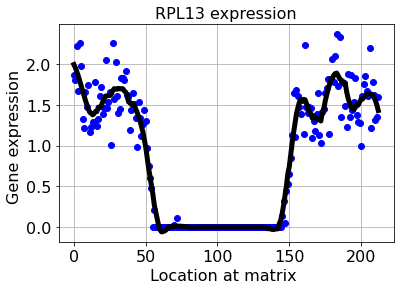

Circular mean and variance of RPL13 (-0.16250849956078242, 0.40656725590599463)
Moran's I score of RPL13 0.17388365832119104


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


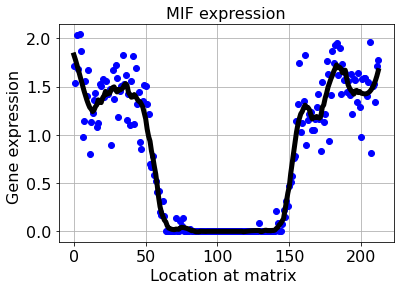

Circular mean and variance of MIF (-0.0765225231578294, 0.42112462801643324)
Moran's I score of MIF 0.17814168622704368


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


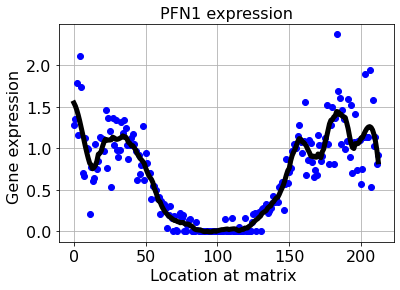

Circular mean and variance of PFN1 (-0.22917311255148645, 0.51249292739933)
Moran's I score of PFN1 0.156499183734292


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


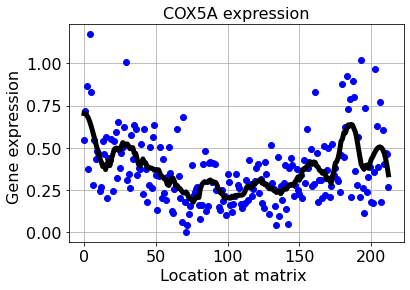

Circular mean and variance of COX5A (-0.09319521834663798, 0.801157249645608)
Moran's I score of COX5A 0.05328381489153764


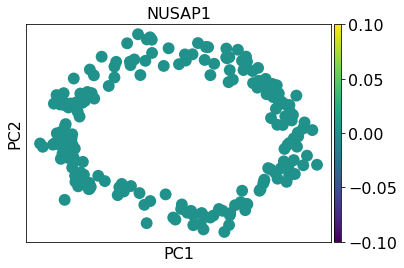

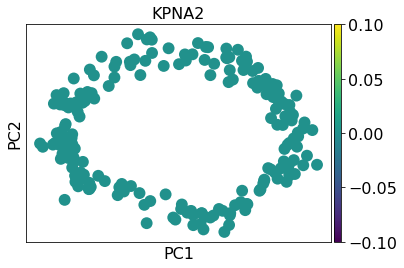

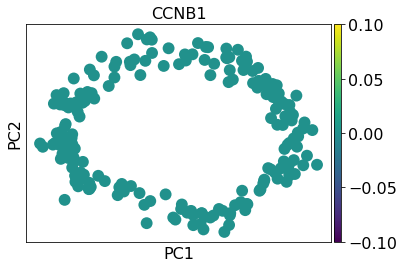

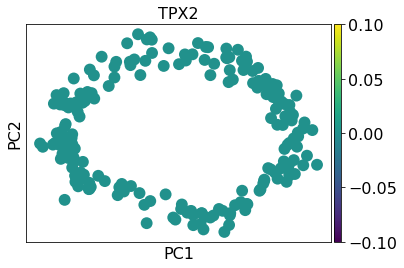

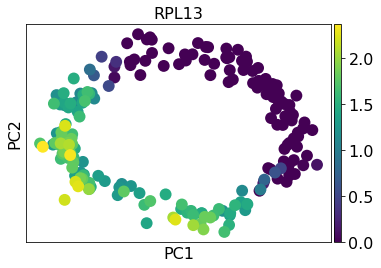

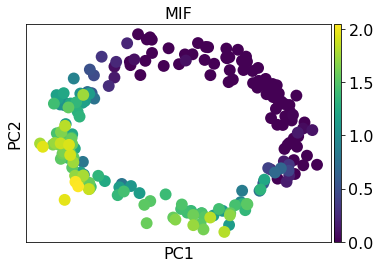

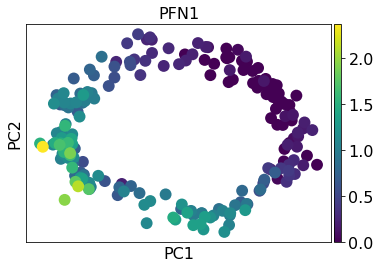

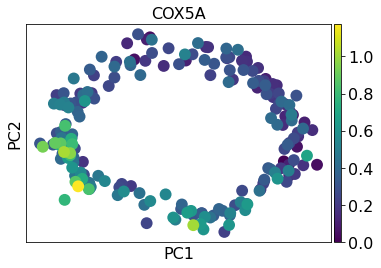

In [28]:
plot_genes(adata_second_signal,marker_genes_list)

In [29]:
adata_filtered_second_signal = adata_filtered.copy()

In [30]:
adata_filtered_second_signal = adata_filtered_second_signal[sga_range,:]


In [31]:
F = filtering_cyclic(adata_filtered_second_signal.X.astype('float64'), regu=0 , iterNum=500)

starting filtering
25
th Iteration    Loss :: 
5.947036224577223
50
th Iteration    Loss :: 
4.450032853775701
75
th Iteration    Loss :: 
3.7228841451109593
100
th Iteration    Loss :: 
3.2722168350824465
125
th Iteration    Loss :: 
2.9550905871609245
150
th Iteration    Loss :: 
2.7145436465004464
175
th Iteration    Loss :: 
2.5230578356311417
200
th Iteration    Loss :: 
2.3653719503132926
225
th Iteration    Loss :: 
2.2321717993538526
250
th Iteration    Loss :: 
2.1175933558055844
275
th Iteration    Loss :: 
2.0174627172101025
300
th Iteration    Loss :: 
1.9288990851795635
325
th Iteration    Loss :: 
1.8498728964118185
350
th Iteration    Loss :: 
1.778702189802935
375
th Iteration    Loss :: 
1.7141516736118647
400
th Iteration    Loss :: 
1.655266661207614
425
th Iteration    Loss :: 
1.6012355432471028
450
th Iteration    Loss :: 
1.5514246911144245
475
th Iteration    Loss :: 
1.505317951021147
500
th Iteration    Loss :: 
1.4624969568832984


In [32]:
adata_filtered_second_signal.X = adata_filtered_second_signal.X *F

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


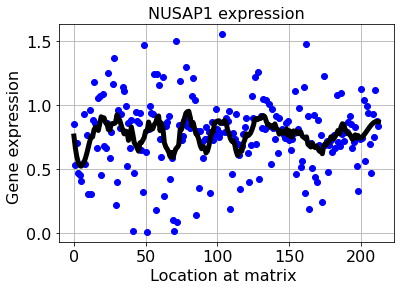

Circular mean and variance of NUSAP1 (2.5811657403574046, 0.9906902596923093)
Moran's I score of NUSAP1 0.000841539056280474


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


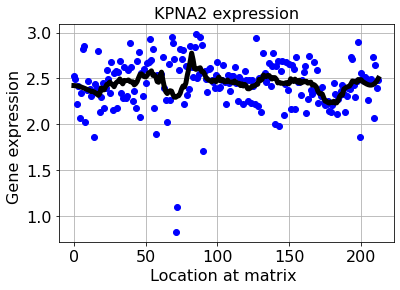

Circular mean and variance of KPNA2 (2.557133097154916, 0.9888854951764292)
Moran's I score of KPNA2 0.004848198849883705


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


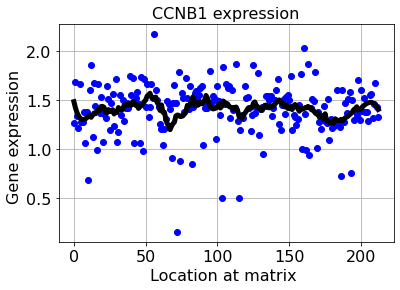

Circular mean and variance of CCNB1 (2.60060831724606, 0.9895881846851022)
Moran's I score of CCNB1 0.0018749852568841227


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


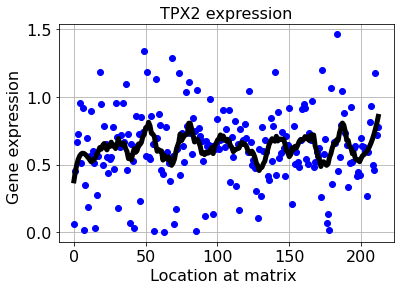

Circular mean and variance of TPX2 (2.632598244742966, 0.9883740898234293)
Moran's I score of TPX2 0.0007547008953547303


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


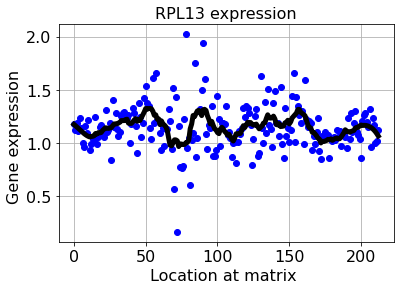

Circular mean and variance of RPL13 (2.59056282288521, 0.9898839079951368)
Moran's I score of RPL13 0.002741359790445132


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


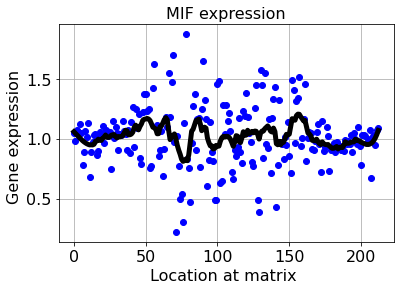

Circular mean and variance of MIF (2.557680216633333, 0.9899367579021608)
Moran's I score of MIF 0.00177050397129487


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


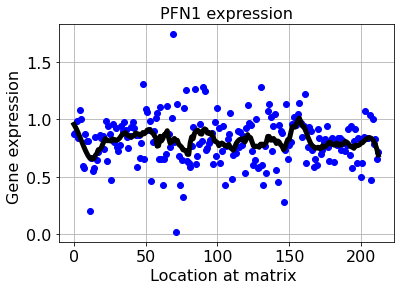

Circular mean and variance of PFN1 (2.559293635908183, 0.9895969811980072)
Moran's I score of PFN1 0.001463415759869045


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


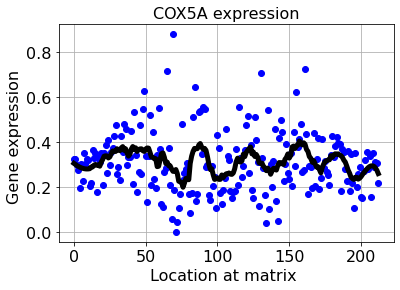

Circular mean and variance of COX5A (1.1969393369287873, 0.994293590772039)
Moran's I score of COX5A 0.001640451276488064


/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata.obsm['X_pca'] = X_pca


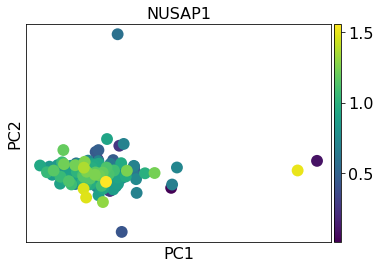

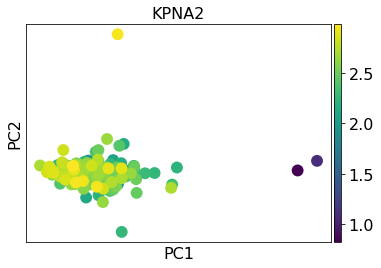

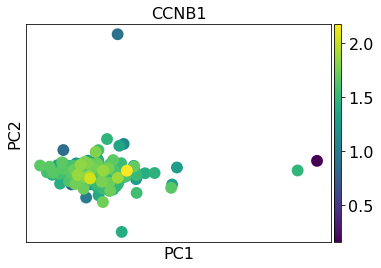

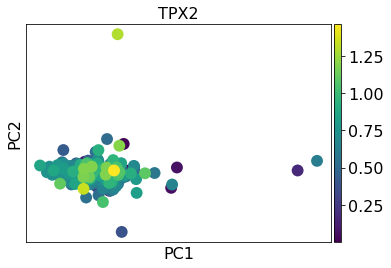

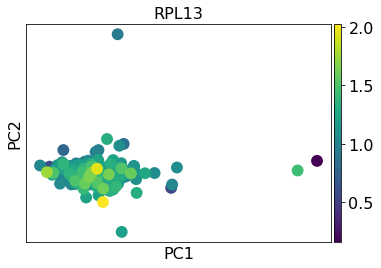

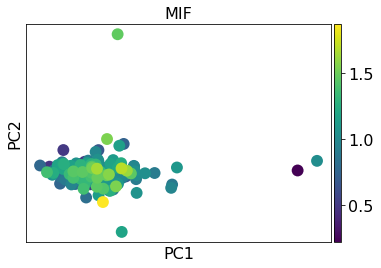

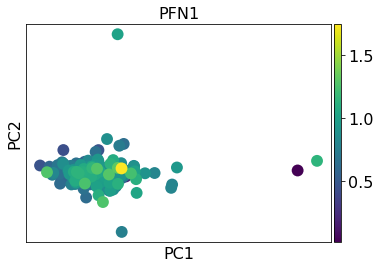

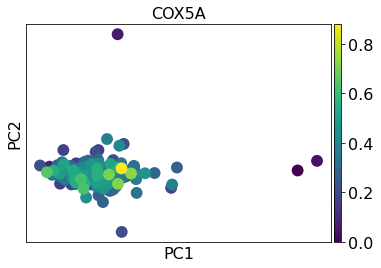

In [33]:
plot_genes(adata_filtered_second_signal,marker_genes_list)#,   title='Enhanced ordering oscillator')


In [35]:
adata_raw = sc.read_csv('GSE64016_H1andFUCCI_normalized_EC.csv.gz')
adata_raw=adata_raw.T
adata_raw = adata_raw[:213,:]
marker_genes_list= ['NUSAP1', 'KPNA2', 'CCNB1','TPX2','RPL13','MIF','PFN1','COX5A']
sc.pp.filter_genes(adata_raw, min_counts=1)         # only consider genes with more than 1 count
sc.pp.normalize_per_cell(adata_raw, counts_per_cell_after=1e4)
sc.pp.log1p(adata_raw)                              
sc.pp.highly_variable_genes(adata_raw, n_top_genes=3000, flavor='seurat_v3')
for gene in marker_genes_list:
    adata_raw.var.highly_variable[gene]=True
adata_raw = adata_raw[:, adata_raw.var.highly_variable]



/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:249: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_counts'] = number
/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3883074722.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_raw.var.highly_variable[gene]=True


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


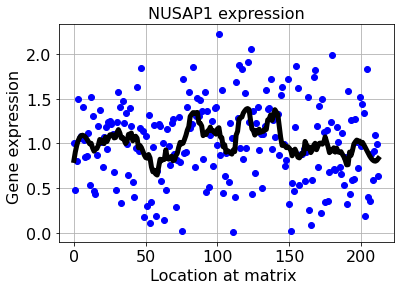

Circular mean and variance of NUSAP1 (-2.9374082378328117, 0.9526781460421018)
Moran's I score of NUSAP1 0.0059532890362672085


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


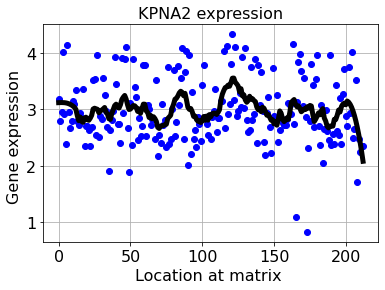

Circular mean and variance of KPNA2 (-2.9906294289279653, 0.9854058754955748)
Moran's I score of KPNA2 0.003374071392397669


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


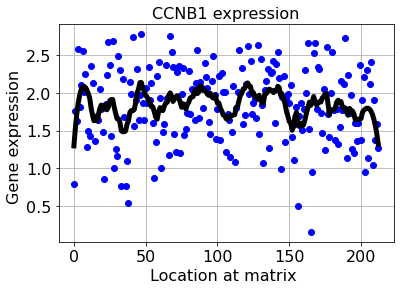

Circular mean and variance of CCNB1 (3.0461884624177338, 0.975045058435974)
Moran's I score of CCNB1 0.004150128425945579


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


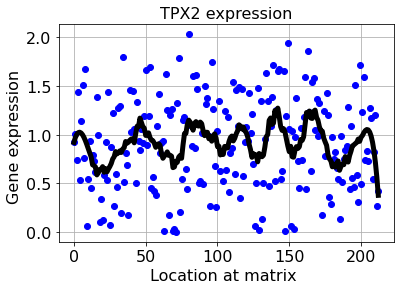

Circular mean and variance of TPX2 (-2.672536741645664, 0.9553776004882478)
Moran's I score of TPX2 0.003764948668178548


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


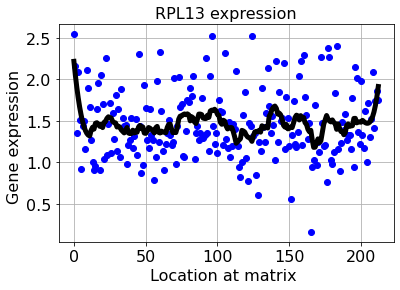

Circular mean and variance of RPL13 (0.017178055093044917, 0.9920540371739072)
Moran's I score of RPL13 0.0014348895057958435


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


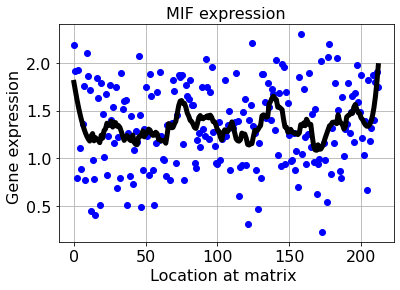

Circular mean and variance of MIF (-1.1243262237904532, 0.9895794216095763)
Moran's I score of MIF 0.0017478676627921382


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


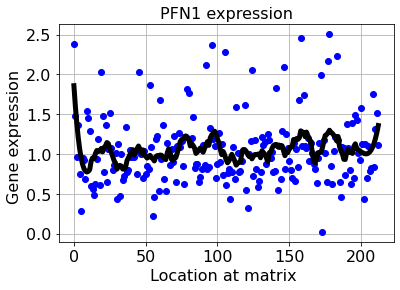

Circular mean and variance of PFN1 (-1.408167854469167, 0.9759249121892014)
Moran's I score of PFN1 0.0022281834048444244


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_53959/3861734690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(range(ncells),(np.array(adata[:,i].X)), 'bo',color='b')


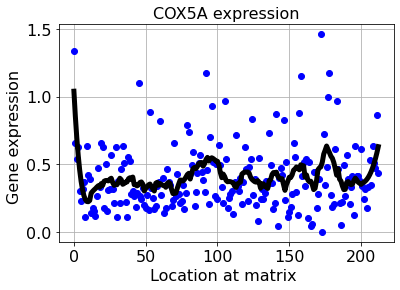

Circular mean and variance of COX5A (-1.6388729376132427, 0.9638856531654961)
Moran's I score of COX5A 0.002678427477522577


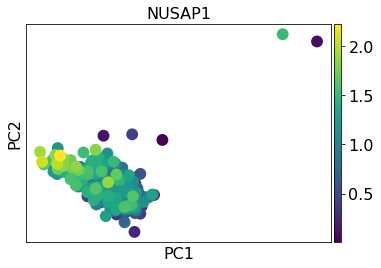

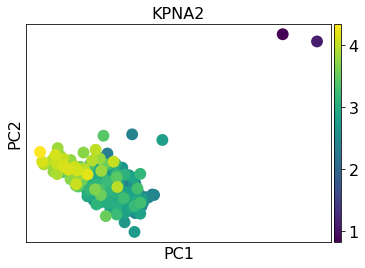

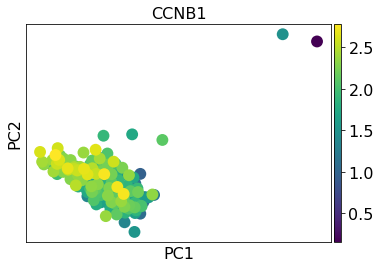

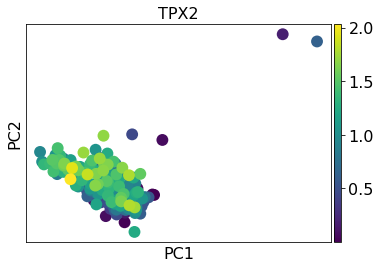

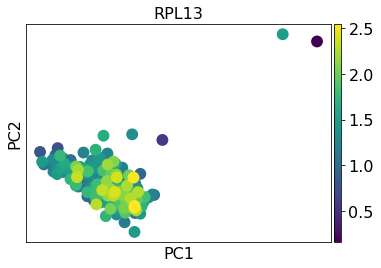

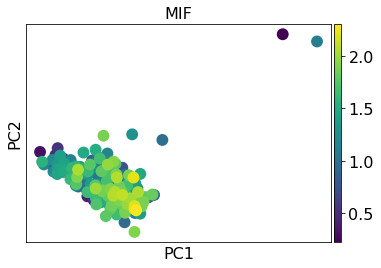

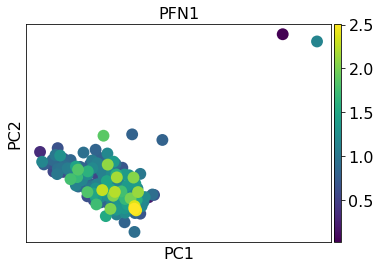

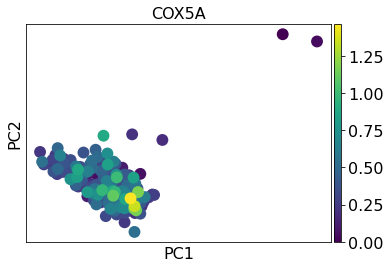

In [36]:
plot_genes(shuffle_adata(adata_raw),marker_genes_list)#,   title='Enhanced ordering oscillator')
